## Training K-Nearest Neighbors 

O K-Nearest Neighbors (KNN) é um algoritmo de aprendizado supervisionado simples e intuitivo, utilizado para tarefas de classificação e regressão. Seu funcionamento é baseado na ideia de que exemplos semelhantes tendem a ter resultados semelhantes. Para classificar um novo dado, o KNN busca os *K* exemplos mais próximos no conjunto de treinamento, geralmente medindo a distância com métricas como a Euclidiana. Na classificação, a classe mais frequente entre esses vizinhos é atribuída ao novo exemplo; na regressão, é calculada a média dos valores dos vizinhos. O KNN não possui fase de treinamento propriamente dita, sendo considerado um método preguiçoso (*lazy learner*), pois só realiza os cálculos no momento da previsão. Embora seja fácil de implementar e interpretar, o KNN pode ser sensível a dados ruidosos e tornar-se computacionalmente custoso com grandes volumes de dados, além de depender fortemente da escolha de *K* e da métrica de distância.

<table>
        <thead>
            <tr>
                <th rowspan="2">Modelo</th>
                <th rowspan="2">Acurácia</th>
                <th colspan="3">Precisão</th>
                <th colspan="3">Recall</th>
                <th colspan="3">F1-Score</th>
            </tr>
            <tr>
                <th>Classe 0</th>
                <th>Classe 1</th>
                <th>Classe 2</th>
                <th>Classe 0</th>
                <th>Classe 1</th>
                <th>Classe 2</th>
                <th>Classe 0</th>
                <th>Classe 1</th>
                <th>Classe 2</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>KNN - All</td>
                <td>94%</td>
                <td>0.98</td>
                <td>0.82</td>
                <td>0.70</td>
                <td>0.94</td>
                <td>0.90</td>
                <td>0.90</td>
                <td>0.96</td>
                <td>0.86</td>
                <td>0.79</td>
            </tr>
            <tr>
                <td>KNN - Selected</td>
                <td>94%</td>
                <td>0.98</td>
                <td>0.82</td>
                <td>0.70</td>
                <td>0.94</td>
                <td>00.90</td>
                <td>0.90</td>
                <td>0.96</td>
                <td>0.86</td>
                <td>0.79</td>
            </tr>
</table>

### Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

In [2]:
output_dir = '../images'
os.makedirs(output_dir, exist_ok=True)

In [3]:
def save_plot(fig, filename):
    file_path = os.path.join(output_dir, filename)
    fig.savefig(file_path, bbox_inches='tight')
    print(f'Imagem salva como {file_path}')

### Recovering the data

In [4]:
import pandas as pd

In [5]:
ML_ROOT_DIR = "../../ml-models"
FOLDER_ID = "dataset"
LDD_PATH = os.path.join(ML_ROOT_DIR, FOLDER_ID)

In [6]:
train_data = pd.read_csv(os.path.join(LDD_PATH, 'ldd_train_resampled.csv'))

In [7]:
train_data.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,60,5.0,70,8.1,8.6,3.5,1.8,5.3,1.6,29.0,0
1,1,55,2.6,48,11.8,5.1,1.2,1.0,3.6,0.5,33.0,0
2,1,51,10.4,76,7.3,3.3,2.0,1.0,1.2,0.9,33.0,0
3,0,77,5.0,106,5.4,3.9,2.1,1.2,4.2,1.1,24.0,2
4,1,54,6.8,73,7.5,5.1,2.0,1.3,1.4,1.5,39.0,0


In [8]:
test_data = pd.read_csv(os.path.join(LDD_PATH, 'ldd_test.csv'))

In [9]:
test_data.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,1,52,5.3,56,8.8,5.3,2.5,1.1,2.3,1.1,29.0,0
1,0,60,3.0,42,6.2,5.8,0.9,1.0,4.4,0.4,27.0,0
2,1,52,3.0,60,7.0,3.8,3.2,0.8,1.7,1.4,33.0,0
3,1,45,4.3,71,7.2,5.6,2.0,1.1,3.0,1.0,19.0,0
4,0,30,3.0,42,4.1,4.9,1.3,1.2,3.2,0.5,22.0,2


In [10]:
X_train = train_data.drop(columns=['CLASS'])
y_train = train_data['CLASS']

In [11]:
X_test = test_data.drop(columns=['CLASS'])
y_test = test_data['CLASS']

### Training with all features

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [13]:
model = KNeighborsClassifier(n_neighbors=5) 
model.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
y_pred = model.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.4f}")

Acurácia: 0.9150


In [16]:
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       169
           1       0.69      0.90      0.78        10
           2       0.62      0.95      0.75        21

    accuracy                           0.92       200
   macro avg       0.77      0.92      0.83       200
weighted avg       0.94      0.92      0.92       200



In [17]:
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

Matriz de Confusão:
[[154   3  12]
 [  1   9   0]
 [  0   1  20]]


In [18]:
param_grid = {
  'n_neighbors': range(1, 21)
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 21)}, verbose=2)

In [19]:
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

Melhores parâmetros encontrados:
{'n_neighbors': 1}


In [20]:
best_params_model = grid_search.best_estimator_

In [21]:
y_pred_best = best_params_model.predict(X_test)
print(f"Acurácia do modelo otimizado: {accuracy_score(y_test, y_pred_best):.4f}")
print(classification_report(y_test, y_pred_best))

Acurácia do modelo otimizado: 0.9350
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       169
           1       0.82      0.90      0.86        10
           2       0.70      0.90      0.79        21

    accuracy                           0.94       200
   macro avg       0.83      0.92      0.87       200
weighted avg       0.94      0.94      0.94       200



In [22]:
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_best))

Matriz de Confusão:
[[159   2   8]
 [  1   9   0]
 [  2   0  19]]


In [23]:
import joblib
joblib.dump(best_params_model, '../models/KNN_model.joblib')

['../models/KNN_model.joblib']

### Training with the best features

In [24]:
from sklearn.feature_selection import SelectKBest, f_classif

In [25]:
k_values = range(1, X_train.shape[1] + 1)
accuracy_scores = []
selected_features_dict = {}

for k in k_values:
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    model = KNeighborsClassifier()
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)

    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

    selected_features_indices = np.where(selector.get_support())[0]

    if hasattr(X_train, 'columns'):
        selected_features_dict[k] = X_train.columns[selected_features_indices].tolist()
    else:
        selected_features_dict[k] = selected_features_indices.tolist()

In [26]:
best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print(f"Melhor número de características: {best_k}")

Melhor número de características: 3


In [27]:
print("Características selecionadas para o melhor k:")
print(selected_features_dict[best_k])

Características selecionadas para o melhor k:
['AGE', 'HbA1c', 'BMI']


In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

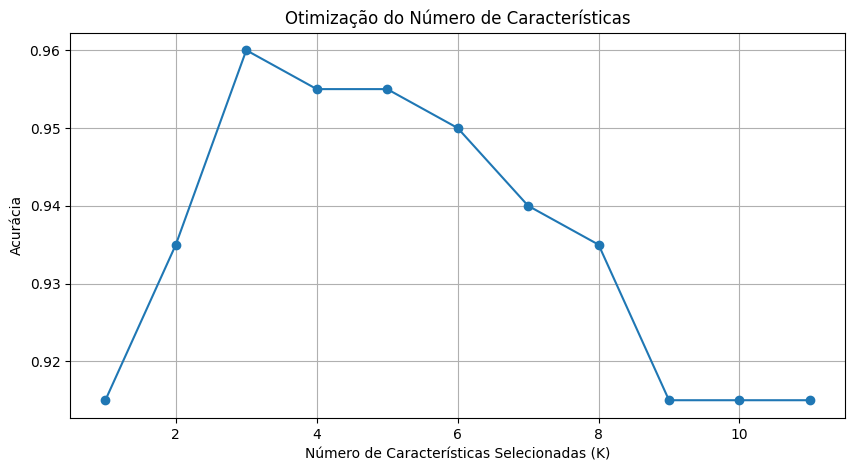

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.xlabel('Número de Características Selecionadas (K)')
plt.ylabel('Acurácia')
plt.title('Otimização do Número de Características')
plt.grid()
plt.show()

In [31]:
model_k = KNeighborsClassifier(n_neighbors=5)
model_k.fit(X_train_selected, y_train)

KNeighborsClassifier()

In [32]:
y_pred = model_k.predict(X_test)

c:\Users\luizf\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [33]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.4f}")

Acurácia: 0.9150


In [34]:
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       169
           1       0.69      0.90      0.78        10
           2       0.62      0.95      0.75        21

    accuracy                           0.92       200
   macro avg       0.77      0.92      0.83       200
weighted avg       0.94      0.92      0.92       200



In [35]:
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

Matriz de Confusão:
[[154   3  12]
 [  1   9   0]
 [  0   1  20]]


In [36]:
param_grid = {
  'n_neighbors': range(1, 21)
}

grid_search = GridSearchCV(estimator=model_k, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 21)}, verbose=2)

In [37]:
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

Melhores parâmetros encontrados:
{'n_neighbors': 1}


In [38]:
best_model_k = grid_search.best_estimator_

In [39]:
y_pred_best = best_model_k.predict(X_test)
print(f"Acurácia do modelo otimizado: {accuracy_score(y_test, y_pred_best):.4f}")
print(classification_report(y_test, y_pred_best))

Acurácia do modelo otimizado: 0.9350
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       169
           1       0.82      0.90      0.86        10
           2       0.70      0.90      0.79        21

    accuracy                           0.94       200
   macro avg       0.83      0.92      0.87       200
weighted avg       0.94      0.94      0.94       200



In [40]:
joblib.dump(best_model_k, '../models/KNN_KBest_model.joblib')

['../models/KNN_KBest_model.joblib']